In [1]:
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

# import mplcyberpunk
# plt.style.use("cyberpunk")
# mplcyberpunk.add_glow_effects()

In [2]:
df = pd.read_table('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit', header=None) 
df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']
# # df.head()
# df.transpose().hist()

In [7]:
def trim_axs(axs, N):
        """
        Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
        """
        axs = axs.flat
        for ax in axs[N:]:
            ax.remove()

        return axs[:N]

In [8]:
def plot_hist(cfit):

    
    def trim_axs(axs, N):
        """
        Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
        """
        axs = axs.flat
        for ax in axs[N:]:
            ax.remove()

        return axs[:N]
    
    df = pd.read_table(cfit, header=None) 
    df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']    
    
    axs = plt.figure(figsize=(8*3,7*2)).subplots(2, 3, sharey=True)
    axs = trim_axs(axs,len(df.index))
    
    colors = ['deepskyblue','pink','coral','mediumslateblue','cornflowerblue','seagreen']
    
    for i in range(len(df.index)):
        axs.flat[i].hist(df.iloc[i],edgecolor='white', linewidth=1, color=colors[i])
        axs.flat[i].set_title(df.index[i],weight='bold', size=14)
        axs[i].tick_params(axis='x', labelrotation=30)
        plt.xticks(ha='right')
        axs.flat[i].ticklabel_format(scilimits=(-3,0))
        
#     https://www.pythoncharts.com/2019/05/17/rotating-axis-labels/

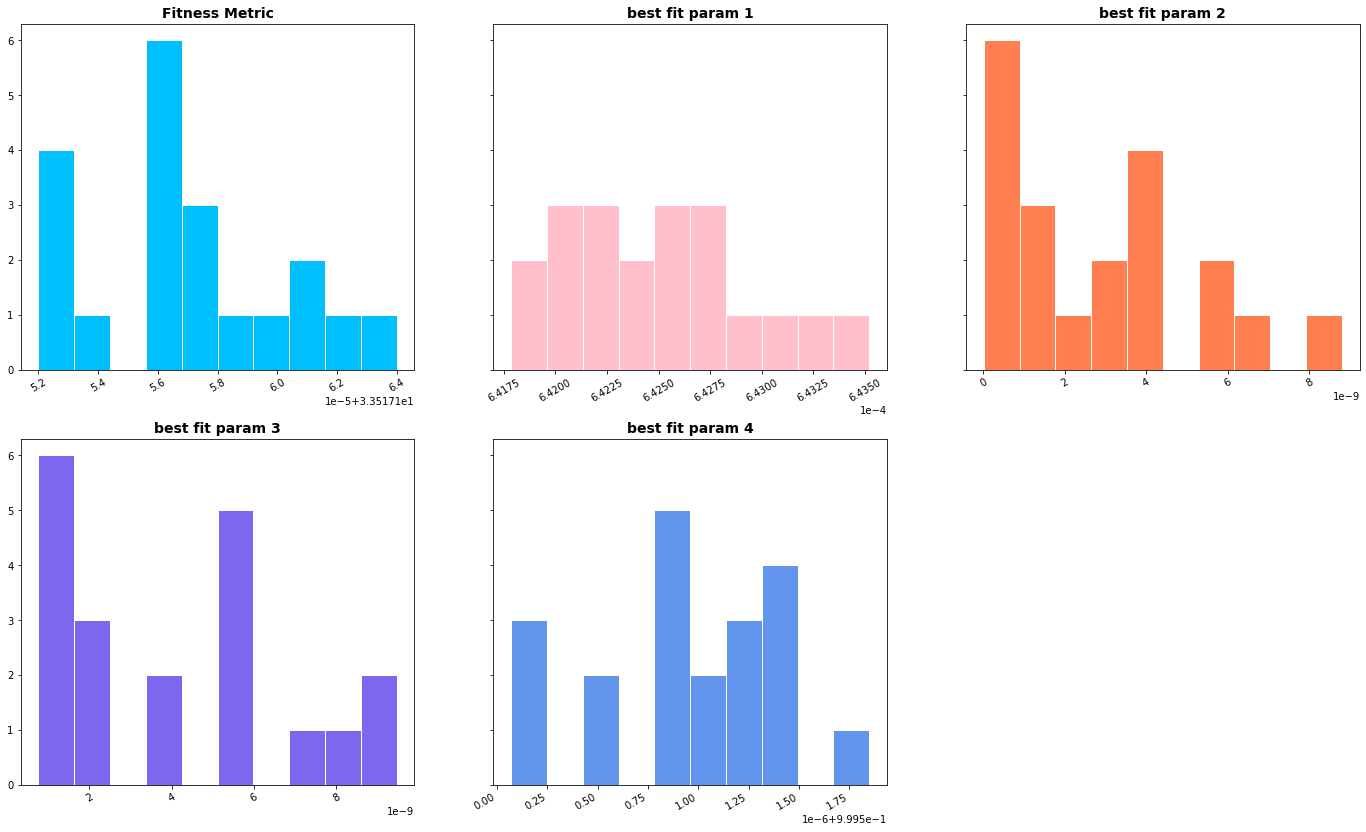

In [9]:
plot_hist('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit')
# works on command line

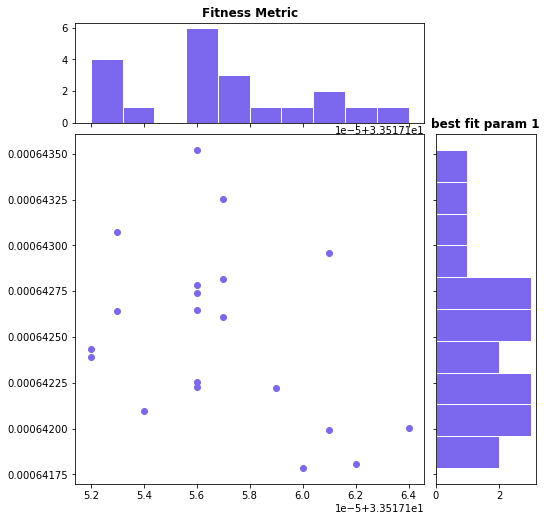

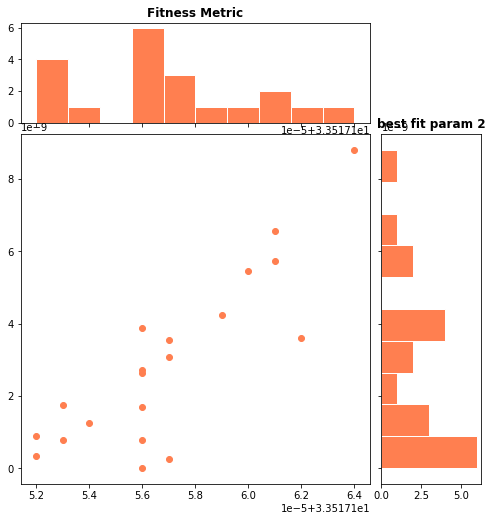

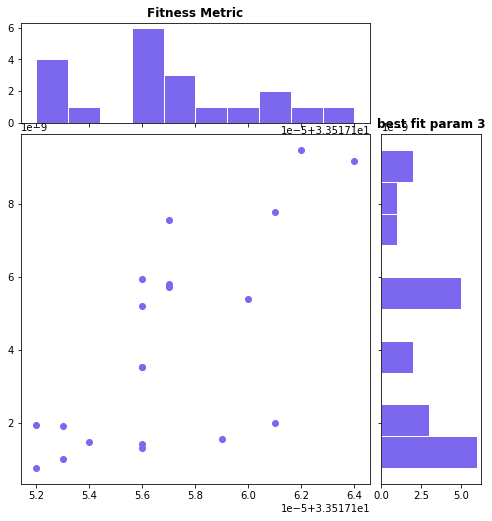

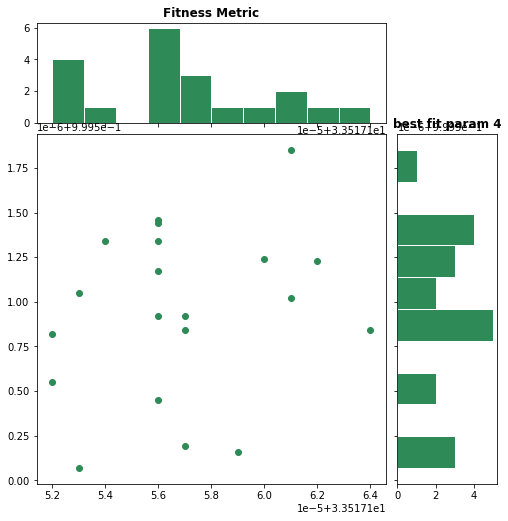

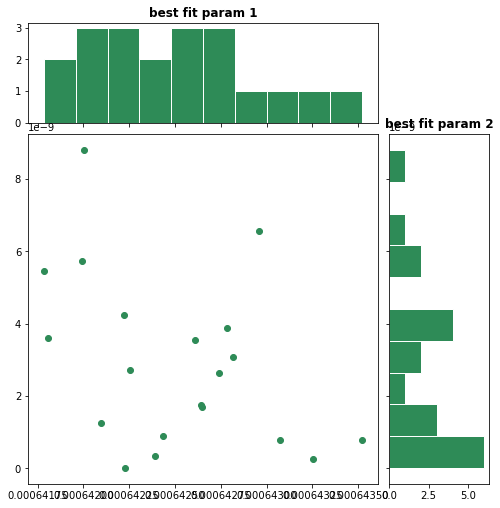

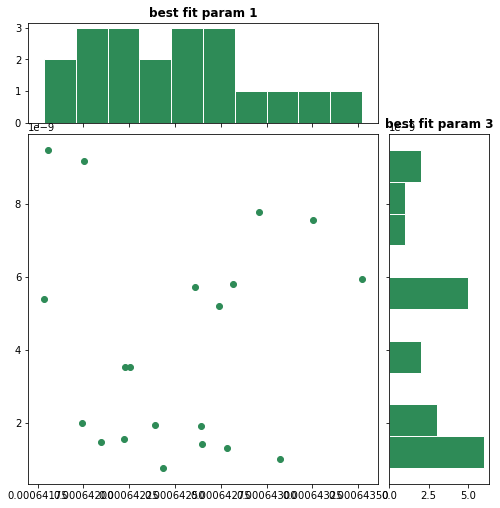

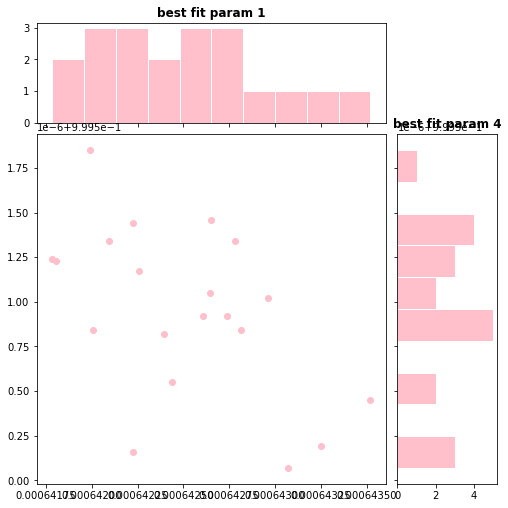

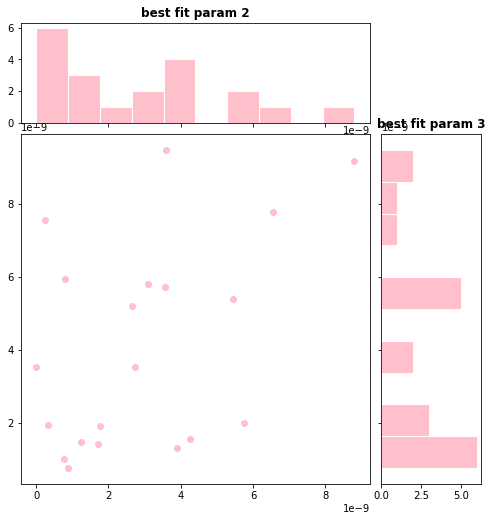

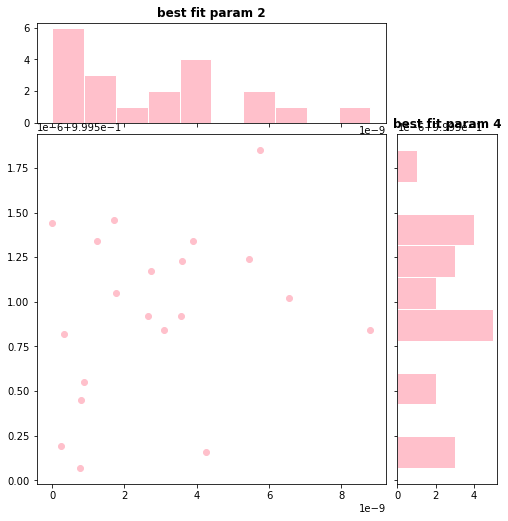

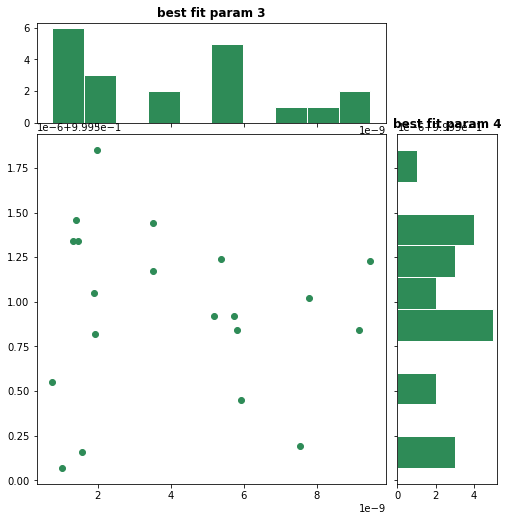

In [10]:
# working on it..
def scatter_hist(x, y, ax, ax_histx, ax_histy):
   
    """
    Creates pairwise scatterplot of each parameter with histograms of each param

    https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_hist.html
    
    """

    # remove x&y labels labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    colors = ['deepskyblue','pink','coral','mediumslateblue','cornflowerblue','seagreen']
    c1 = random.choice(colors)
#     colors.remove(c1)
#     c2 = random.choice(colors)
    
    ax.scatter(x,y, color = c1)
    
    ax_histx.hist(x, edgecolor='white', linewidth=1, color=c1)
    ax_histy.hist(y, orientation='horizontal', edgecolor='white', color = c1)


    
def hist_plt(df, indx, indy):
    
    """
    Plots scatterplot and customizes histograms of both parameters df.iloc[indx], df.iloc[indy]
    
    df = dataframe
    indx = index of first param  df.iloc[indx]
    indy = index of second param  df.iloc[indy]
    
    https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py
    
    """
    
    fig = plt.figure(figsize=(8, 8))
     
        
    # using a gridspec to customize fig layouts
    gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)

#     gs = fig.add_gridspec(4, 4, left=0.1, right=0.9, bottom=0.1, top=0.9,  wspace=0.05, hspace=0.05)

#     for i in range(len(df.index)):
        
        
        
    ax = fig.add_subplot(gs[1,0])

    ax_histx = fig.add_subplot(gs[0,0], sharex=ax)
    ax_histx.set_title(df.index[indx],weight='bold')

    ax_histy = fig.add_subplot(gs[1,1], sharey=ax)
    ax_histy.set_title(df.index[indy], weight='bold')
    
    scatter_hist(df.iloc[indx], df.iloc[indy], ax, ax_histx, ax_histy)
    
    
    
    plt.show()

    
    
hist_plt(df, 0, 1)
hist_plt(df, 0, 2)
hist_plt(df, 0, 3)
hist_plt(df, 0, 4)
hist_plt(df, 1, 2)
hist_plt(df, 1, 3)
hist_plt(df, 1, 4)
hist_plt(df, 2, 3)
hist_plt(df, 2, 4)
hist_plt(df, 3, 4)

# now edit the funcs so it takes in cfit file as input !! 

# how to fix the e-5+33.5 text below the hist?

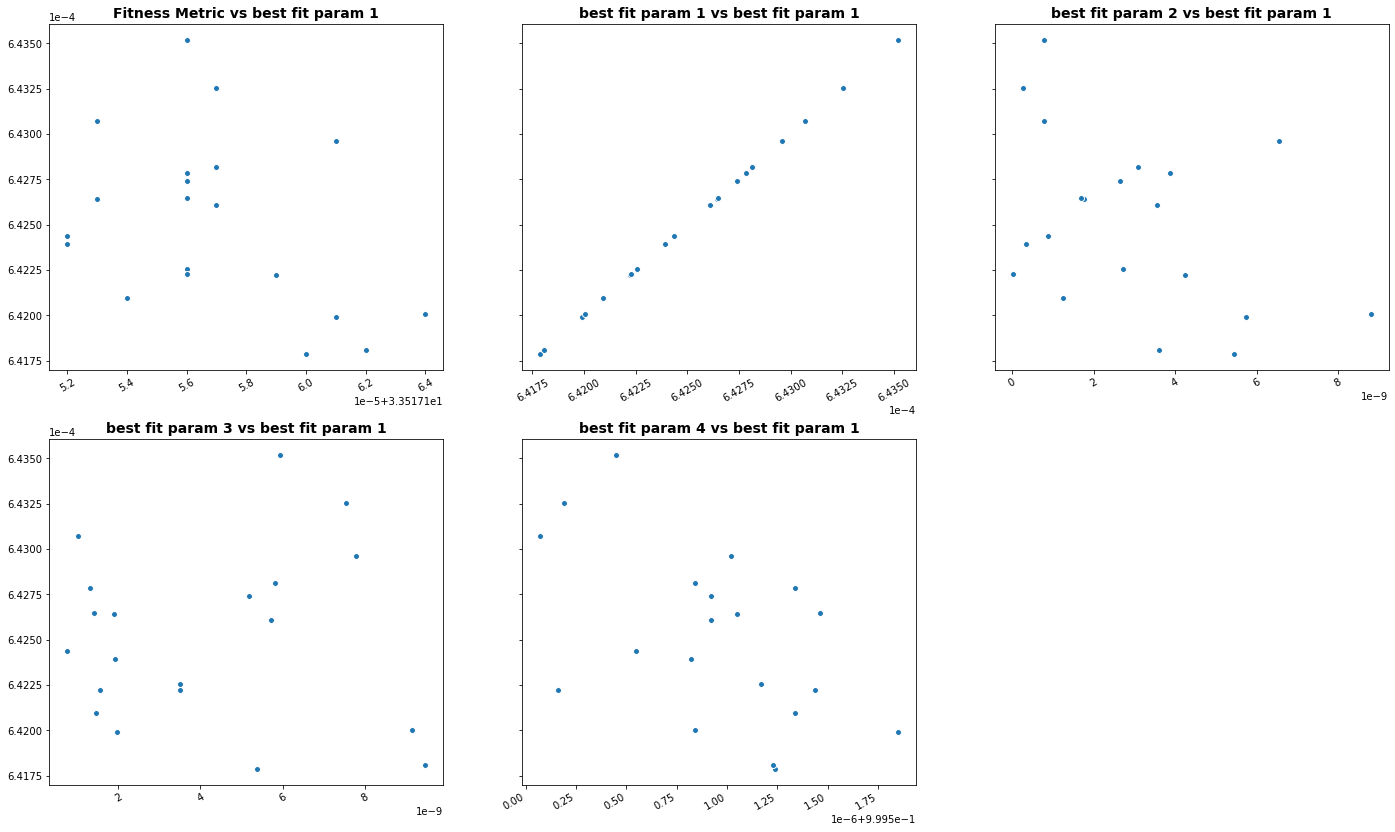

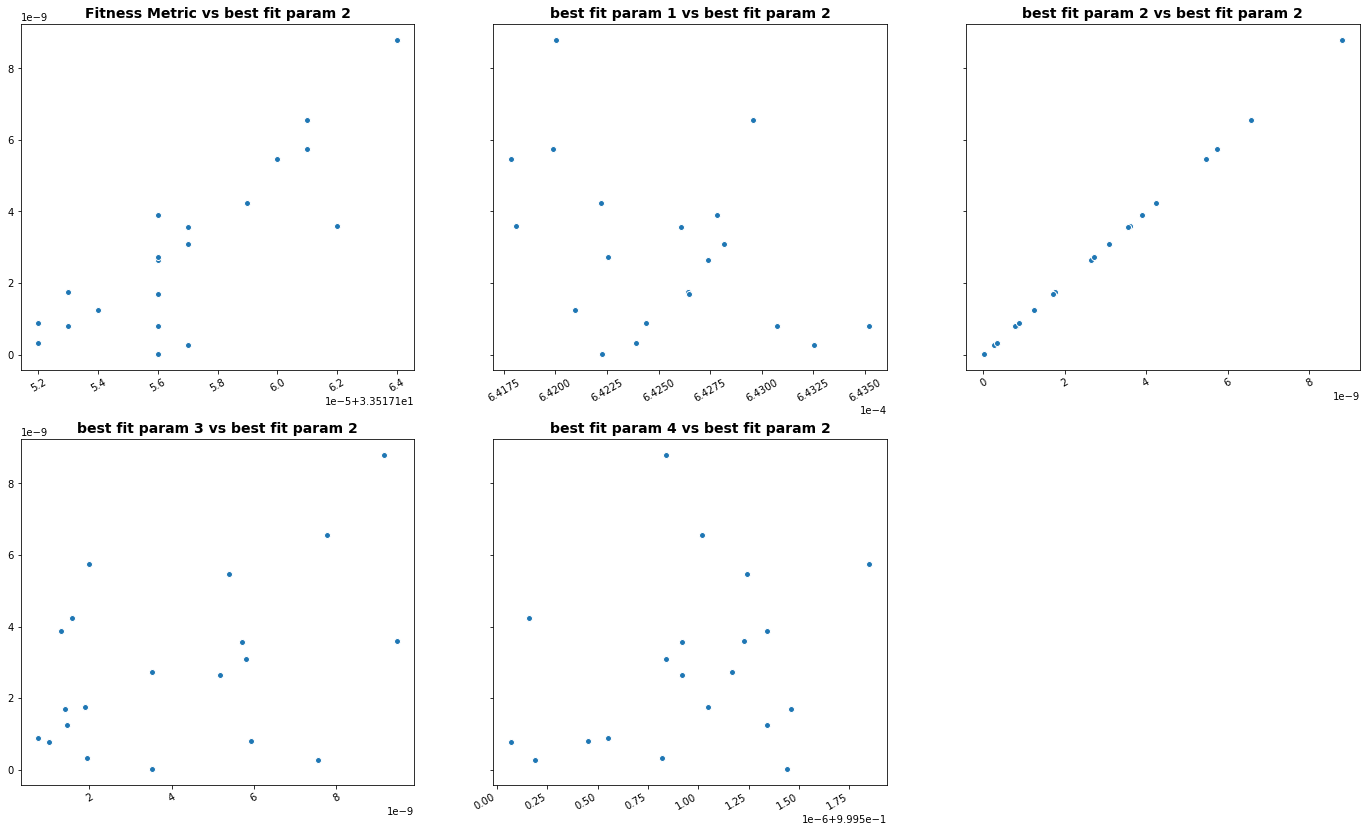

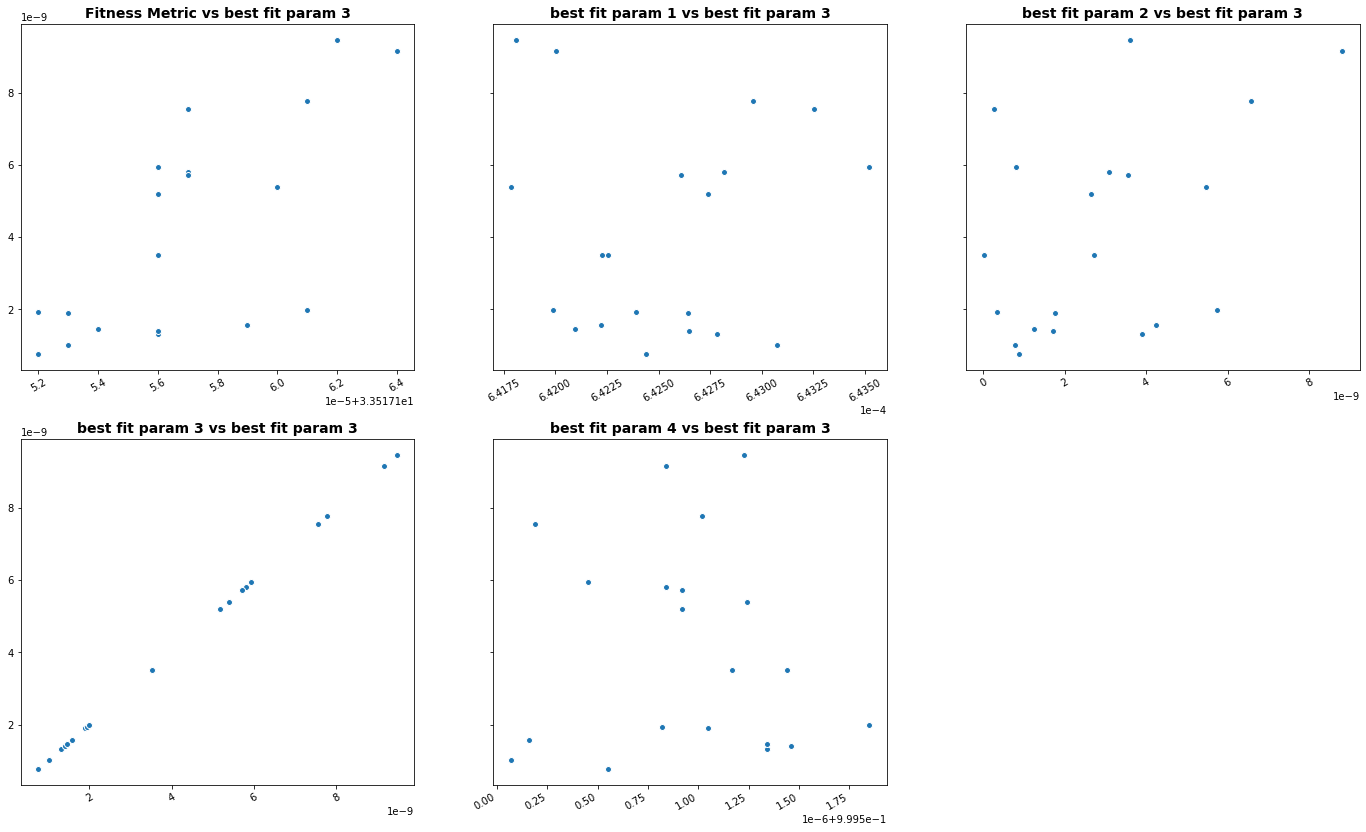

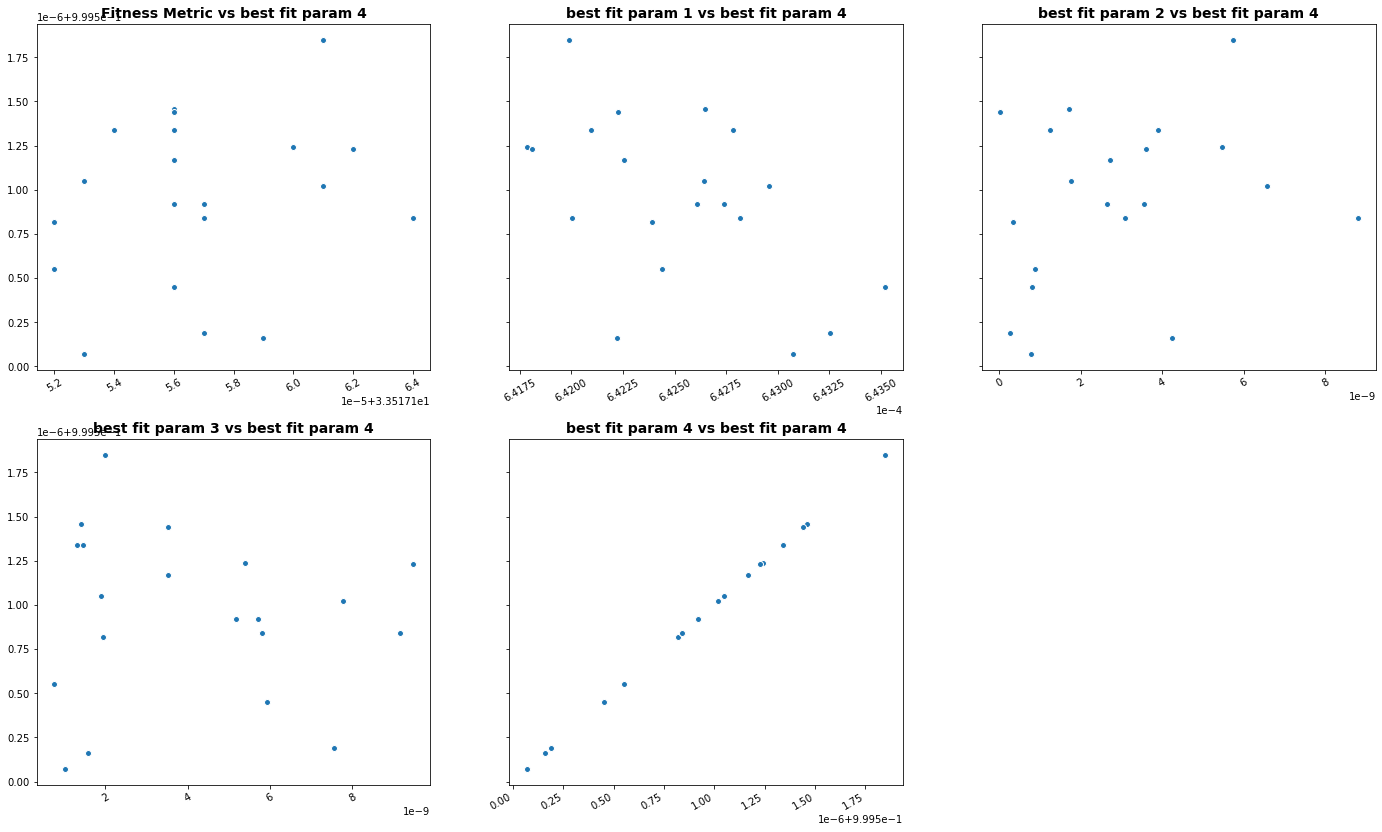

In [11]:
# Pairwise scatterplots -- working on it......

def plot_scatter(cfit):
    
    df = pd.read_table(cfit, header=None) 
    df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']    
        
        
    for j in range(1, len(df.index)):
        
        axs = plt.figure(figsize=(8*3,7*2)).subplots(2,3, sharey=True)
        axs = trim_axs(axs,len(df.index))  
           
        for i in range(len(df.index)):
            
#             if i != j:  # how to remove scatterplot for i vs i ?
                
            axs.flat[i].scatter(df.iloc[i],df.iloc[j], edgecolor='white', linewidth=1)

            axs.flat[i].set_title(df.index[i] + " vs " + df.index[j],weight='bold', size=14)
            axs[i].tick_params(axis='x', labelrotation=30)

                
            plt.xticks(ha='right')

            axs.flat[i].ticklabel_format(scilimits=(-3,0))
        

        

plot_scatter('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit')



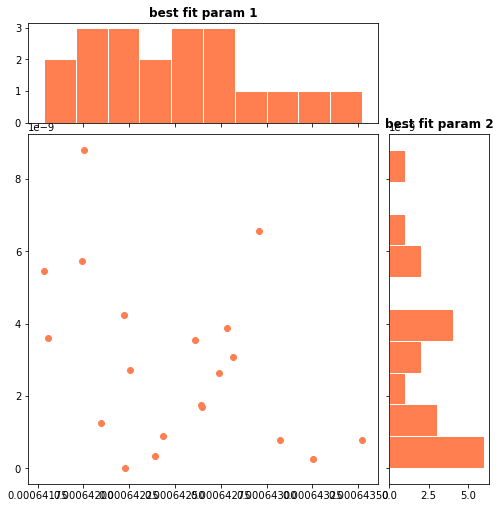

In [12]:
# Scatterplot & histograms old version - fixed above in hist_plt

fig = plt.figure(figsize=(8, 8))

gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0], sharex=ax)
ax_histx.set_title(df.index[1],weight='bold')

ax_histy = fig.add_subplot(gs[1,1], sharey=ax)
ax_histy.set_title(df.index[2], weight='bold')

scatter_hist(df.iloc[1], df.iloc[2], ax, ax_histx, ax_histy)

plt.show()

In [13]:
# def trim_axs(axs, N):
#     """
#     Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
#     """
#     axs = axs.flat
#     for ax in axs[N:]:
#         ax.remove()

#     return axs[:N]

# def plot_hist(cfit):


#     df = pd.read_table(cfit, header=None) 
#     df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']    
    
#     axs = plt.figure(figsize=(8*3,7*2)).subplots(2, 3, sharey=True)
#     axs = trim_axs(axs,len(df.index))
    
#     colors = ['deepskyblue','pink','coral','mediumslateblue','cornflowerblue','seagreen']
    
#     for i in range(len(df.index)):
        
#         axs.flat[i].hist(df.iloc[i],edgecolor='white', linewidth=1)#, color=colors[i])
        
        
#         axs.flat[i].set_title(df.index[i],weight='bold', size=14)
#         axs[i].tick_params(axis='x', labelrotation=30)
        
#         plt.xticks(ha='right')
        
#         axs.flat[i].ticklabel_format(scilimits=(-3,0))
        

       
#     plt.show()
        
        
# #     https://www.pythoncharts.com/2019/05/17/rotating-axis-labels/

In [14]:
# plot_hist('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit')
# works on command line